**Extraction of Dataset from  Kaggle**

In [11]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/root/.kaggle'


In [13]:
from google.colab import files
uploaded = files.upload()

import os
import shutil

kaggle_file = list(uploaded.keys())[0]

# Create expected directory
os.makedirs('/root/.config/kaggle', exist_ok=True)

# Move kaggle.json to expected path
shutil.move(kaggle_file, '/root/.config/kaggle/kaggle.json')

# Set correct permission
os.chmod('/root/.config/kaggle/kaggle.json', 0o600)

print("kaggle.json moved to /root/.config/kaggle/kaggle.json")


Saving kaggle.json to kaggle.json
kaggle.json moved to /root/.config/kaggle/kaggle.json


In [16]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()
print("Kaggle API authenticated ✅")


Kaggle API authenticated ✅


In [17]:
import os

os.makedirs('spotify_data', exist_ok=True)
print("Folder 'spotify_data' created (if it did not exist).")


Folder 'spotify_data' created (if it did not exist).


In [18]:
api.dataset_download_files('tonygordonjr/spotify-dataset-2023', path='spotify_data', unzip=False)
print("Dataset zip downloaded to 'spotify_data'.")


Dataset URL: https://www.kaggle.com/datasets/tonygordonjr/spotify-dataset-2023
Dataset zip downloaded to 'spotify_data'.


In [19]:
print(os.listdir('spotify_data'))


['spotify-dataset-2023.zip']


In [20]:
import zipfile

zip_path = 'spotify_data/spotify-dataset-2023.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('spotify_data')

print("Dataset unzipped successfully.")


Dataset unzipped successfully.


In [21]:
print(os.listdir('spotify_data'))


['spotify-dataset-2023.zip', 'spotify_features_data_2023.csv', 'spotify-albums_data_2023.csv', 'spotify_data_12_20_2023.csv', 'spotify_artist_data_2023.csv', 'spotify_tracks_data_2023.csv']


In [41]:
import pandas as pd

albums_df = pd.read_csv('spotify_data/spotify-albums_data_2023.csv')
tracks_df = pd.read_csv('spotify_data/spotify_tracks_data_2023.csv')

print(albums_df.head())
print(tracks_df.head())


            track_name                track_id  track_number  duration_ms  \
0        Amazing Grace  6mN8nzCXWUeT5LWEcG1Utx             5       555521   
1         Silent Night  58sgjtx3FOnBBEOd3BQE6C             8       535041   
2      Ancient Canyons  45tQJhm0WSk5VWMZK3FsLK             1       545855   
3  Pacha Mama Medicina  3VFD7QqkJSg0OR6yBwKl7A             6       305241   
4      Palace Of Light  7LwJV5BEIC9BQnzvaBSyCc             7       351060   

  album_type  artists  total_tracks             album_name  \
0      album      NaN             9  Deep Peace Experience   
1      album      NaN             9  Deep Peace Experience   
2      album      NaN             9  Deep Peace Experience   
3      album      NaN             9  Deep Peace Experience   
4      album      NaN             9  Deep Peace Experience   

              release_date               label  ...  artist_3 artist_4  \
0  2015-06-09 00:00:00 UTC  Mountain Music Inc  ...       NaN      NaN   
1  2015-06-09 00

**Transformations on the Dataset**

In [42]:
import pandas as pd
import numpy as np


In [24]:
print(tracks_df.info())
print(tracks_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438938 entries, 0 to 438937
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                438938 non-null  object
 1   track_popularity  438938 non-null  int64 
 2   explicit          438938 non-null  bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 7.1+ MB
None
                       id  track_popularity  explicit
0  02MBhqgR7WeeI4ZfB6Lo0i                 0     False
1  5j4M4gLYuUy9PVw0vsXWyq                 0     False
2  46EucLPJpx0QM3SCjzzdP0                 0     False
3  4nK2LvW3osgDT89S38Mcg6                 0     False
4  1Pq37WIQZDG7yNFnY5IbqG                 0     False


In [43]:
print(tracks_df.columns)


Index(['id', 'track_popularity', 'explicit'], dtype='object')


In [44]:
print(albums_df.columns)

Index(['track_name', 'track_id', 'track_number', 'duration_ms', 'album_type',
       'artists', 'total_tracks', 'album_name', 'release_date', 'label',
       'album_popularity', 'album_id', 'artist_id', 'artist_0', 'artist_1',
       'artist_2', 'artist_3', 'artist_4', 'artist_5', 'artist_6', 'artist_7',
       'artist_8', 'artist_9', 'artist_10', 'artist_11', 'duration_sec'],
      dtype='object')


In [33]:
import pandas as pd


In [45]:
# Import required library
import pandas as pd

# Display columns to confirm structure
print("Tracks columns:", tracks_df.columns)

# Drop unnecessary columns
tracks_columns_to_drop = ['track_preview_url', 'track_href', 'analysis_url']
tracks_df.drop(columns=tracks_columns_to_drop, errors='ignore', inplace=True)

# Drop rows with nulls in important fields
tracks_df.dropna(subset=['track_popularity', 'explicit'], inplace=True)

# Ensure correct dtypes if needed
tracks_df['explicit'] = tracks_df['explicit'].astype(bool)
tracks_df['track_popularity'] = pd.to_numeric(tracks_df['track_popularity'], errors='coerce')

# Final check
print("tracks_df cleaned shape:", tracks_df.shape)
tracks_df.head()



Tracks columns: Index(['id', 'track_popularity', 'explicit'], dtype='object')
tracks_df cleaned shape: (438938, 3)


,id,track_popularity,explicit
0,02MBhqgR7WeeI4ZfB6Lo0i,0,False
1,5j4M4gLYuUy9PVw0vsXWyq,0,False
2,46EucLPJpx0QM3SCjzzdP0,0,False
3,4nK2LvW3osgDT89S38Mcg6,0,False
4,1Pq37WIQZDG7yNFnY5IbqG,0,False


In [46]:
# ✅ Display columns to confirm structure
print("Albums columns:", albums_df.columns)


albums_columns_to_drop = ['album_id', 'artist_id', 'album_popularity']  # Adjust if needed
albums_df.drop(columns=albums_columns_to_drop, errors='ignore', inplace=True)

albums_df.dropna(subset=['duration_ms', 'track_name', 'track_id'], inplace=True)

# ✅ Convert duration to seconds
if 'duration_ms' in albums_df.columns:
    albums_df['duration_sec'] = albums_df['duration_ms'] / 1000


print("albums_df cleaned shape:", albums_df.shape)
albums_df.head()


Albums columns: Index(['track_name', 'track_id', 'track_number', 'duration_ms', 'album_type',
       'artists', 'total_tracks', 'album_name', 'release_date', 'label',
       'album_popularity', 'album_id', 'artist_id', 'artist_0', 'artist_1',
       'artist_2', 'artist_3', 'artist_4', 'artist_5', 'artist_6', 'artist_7',
       'artist_8', 'artist_9', 'artist_10', 'artist_11', 'duration_sec'],
      dtype='object')
albums_df cleaned shape: (438968, 23)


,track_name,track_id,track_number,duration_ms,album_type,artists,total_tracks,album_name,release_date,label,...,artist_3,artist_4,artist_5,artist_6,artist_7,artist_8,artist_9,artist_10,artist_11,duration_sec
0,Amazing Grace,6mN8nzCXWUeT5LWEcG1Utx,5,555521,album,NaN,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,555.521
1,Silent Night,58sgjtx3FOnBBEOd3BQE6C,8,535041,album,NaN,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.041
2,Ancient Canyons,45tQJhm0WSk5VWMZK3FsLK,1,545855,album,NaN,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,545.855
3,Pacha Mama Medicina,3VFD7QqkJSg0OR6yBwKl7A,6,305241,album,NaN,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.241
4,Palace Of Light,7LwJV5BEIC9BQnzvaBSyCc,7,351060,album,NaN,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,351.060


In [47]:

albums_df.columns = albums_df.columns.str.strip()
tracks_df.columns = tracks_df.columns.str.strip()

# Merge on track ID
merged_df = albums_df.merge(
    tracks_df[['id', 'explicit', 'track_popularity']],
    left_on='track_id',
    right_on='id',
    how='left'
)


merged_df.drop(columns=['id'], inplace=True)

print("Merged dataframe shape:", merged_df.shape)
merged_df.head()


Merged dataframe shape: (438968, 25)


,track_name,track_id,track_number,duration_ms,album_type,artists,total_tracks,album_name,release_date,label,...,artist_5,artist_6,artist_7,artist_8,artist_9,artist_10,artist_11,duration_sec,explicit,track_popularity
0,Amazing Grace,6mN8nzCXWUeT5LWEcG1Utx,5,555521,album,NaN,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,555.521,False,2.0
1,Silent Night,58sgjtx3FOnBBEOd3BQE6C,8,535041,album,NaN,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.041,False,2.0
2,Ancient Canyons,45tQJhm0WSk5VWMZK3FsLK,1,545855,album,NaN,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,545.855,False,4.0
3,Pacha Mama Medicina,3VFD7QqkJSg0OR6yBwKl7A,6,305241,album,NaN,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.241,False,1.0
4,Palace Of Light,7LwJV5BEIC9BQnzvaBSyCc,7,351060,album,NaN,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,351.060,False,3.0


In [50]:
# Any song <= 180 seconds is marked as True for 'radio_mix'
albums_df['radio_mix'] = albums_df['duration_sec'] <= 180


In [53]:
albums_df = albums_df.merge(
    tracks_df[['id', 'explicit', 'track_popularity']],
    left_on='track_id',
    right_on='id',
    how='left'
)

# Drop the redundant 'id' from tracks_df
albums_df.drop(columns=['id'], inplace=True)



In [54]:
# Add 'radio_mix' column
albums_df['radio_mix'] = albums_df['duration_sec'] <= 180

# Filter non-explicit and popular tracks
filtered_df = albums_df[(albums_df['explicit'] == False) & (albums_df['track_popularity'] > 50)]

# Final preview
print("Final transformed shape:", filtered_df.shape)
filtered_df.head()


Final transformed shape: (10706, 26)


,track_name,track_id,track_number,duration_ms,album_type,artists,total_tracks,album_name,release_date,label,...,artist_6,artist_7,artist_8,artist_9,artist_10,artist_11,duration_sec,radio_mix,explicit,track_popularity
189,Radicamos En South Central,1kHpljP6paUsQyZgwFDfxn,18,228853,album,NaN,24,Jimmy Humilde Presenta Lo Mejor De Las Calles ...,2018-07-04 00:00:00 UTC,Jimmy Humilde Music,...,NaN,NaN,NaN,NaN,NaN,NaN,228.853,False,False,65.0
1383,Be Mine,2KklXplRtxMsBYo474Es0w,1,161322,compilation,NaN,22,"Deep Pop, Vol. 2",2017-05-19 00:00:00 UTC,Kuroneko Sono,...,NaN,NaN,NaN,NaN,NaN,NaN,161.322,True,False,71.0
1836,Kong,7Cg3F9ZsZ2TYUnlza49NYh,3,237826,album,NaN,12,Black Sands,2010-03-29 00:00:00 UTC,Ninja Tune,...,NaN,NaN,NaN,NaN,NaN,NaN,237.826,False,False,64.0
1839,Kiara,7sqii6BhIDpJChYpU3WjwS,2,230306,album,NaN,12,Black Sands,2010-03-29 00:00:00 UTC,Ninja Tune,...,NaN,NaN,NaN,NaN,NaN,NaN,230.306,False,False,54.0
1841,The Keeper,5hmf3hRQMaDIWuZT1zX3ue,9,288933,album,NaN,12,Black Sands,2010-03-29 00:00:00 UTC,Ninja Tune,...,NaN,NaN,NaN,NaN,NaN,NaN,288.933,False,False,57.0


In [55]:
import sqlite3


In [56]:
# Createing a new SQLite database file in the current directory
conn = sqlite3.connect('spotify_cleaned.db')


cursor = conn.cursor()


In [57]:
# Save the filtered dataframe to a table named 'spotify_tracks'
filtered_df.to_sql('spotify_tracks', conn, if_exists='replace', index=False)


10706

In [58]:
# Read a few rows from the table to verify
cursor.execute("SELECT * FROM spotify_tracks LIMIT 5")
rows = cursor.fetchall()

for row in rows:
    print(row)


('Radicamos En South Central', '1kHpljP6paUsQyZgwFDfxn', 18, 228853, 'album', None, 24, 'Jimmy Humilde Presenta Lo Mejor De Las Calles Vol.3', '2018-07-04 00:00:00 UTC', 'Jimmy Humilde Music', 'Fuerza Regida', None, None, None, None, None, None, None, None, None, None, None, 228.853, 0, 0, 65.0)
('Be Mine', '2KklXplRtxMsBYo474Es0w', 1, 161322, 'compilation', None, 22, 'Deep Pop, Vol. 2', '2017-05-19 00:00:00 UTC', 'Kuroneko Sono', 'Ofenbach', None, None, None, None, None, None, None, None, None, None, None, 161.322, 1, 0, 71.0)
('Kong', '7Cg3F9ZsZ2TYUnlza49NYh', 3, 237826, 'album', None, 12, 'Black Sands', '2010-03-29 00:00:00 UTC', 'Ninja Tune', 'Bonobo', None, None, None, None, None, None, None, None, None, None, None, 237.826, 0, 0, 64.0)
('Kiara', '7sqii6BhIDpJChYpU3WjwS', 2, 230306, 'album', None, 12, 'Black Sands', '2010-03-29 00:00:00 UTC', 'Ninja Tune', 'Bonobo', None, None, None, None, None, None, None, None, None, None, None, 230.306, 0, 0, 54.0)
('The Keeper', '5hmf3hRQMaDIW

<ipython-input-60-adc55a9d7c57>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_labels, x='total_tracks', y='label', palette='viridis')


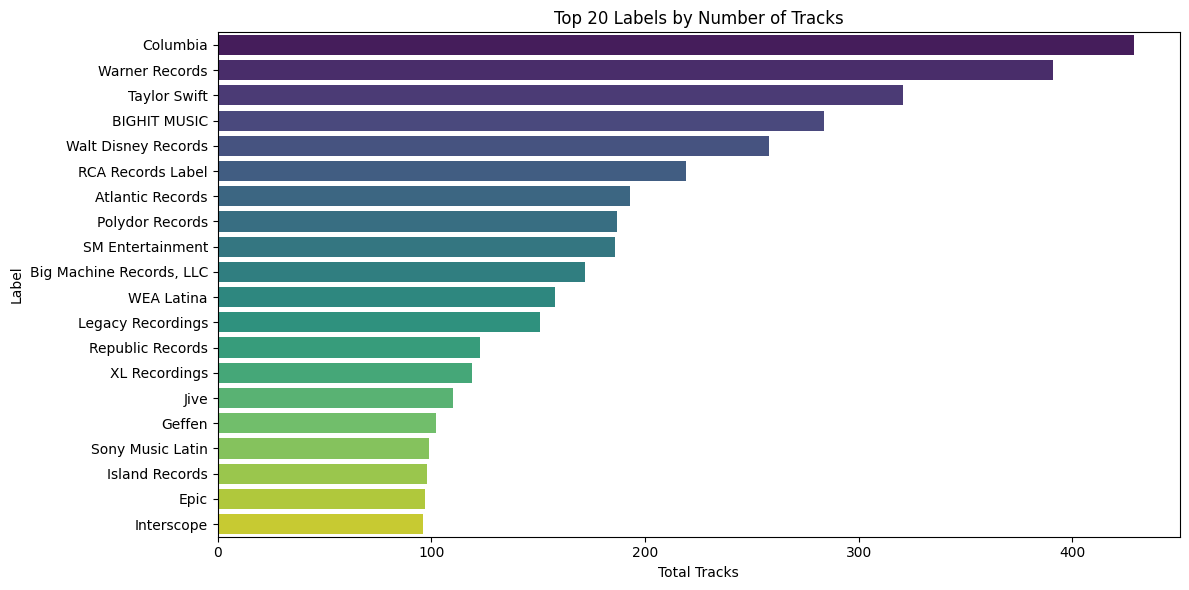

In [60]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect('spotify_cleaned.db')

query = """
SELECT label, COUNT(*) as total_tracks
FROM spotify_tracks
GROUP BY label
ORDER BY total_tracks DESC
LIMIT 20;
"""

top_labels = pd.read_sql_query(query, conn)
conn.close()

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=top_labels, x='total_tracks', y='label', palette='viridis')
plt.title('Top 20 Labels by Number of Tracks')
plt.xlabel('Total Tracks')
plt.ylabel('Label')
plt.tight_layout()
plt.show()


<ipython-input-61-ec179dc85a1d>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_tracks, x='track_popularity', y='track_name', palette='magma')


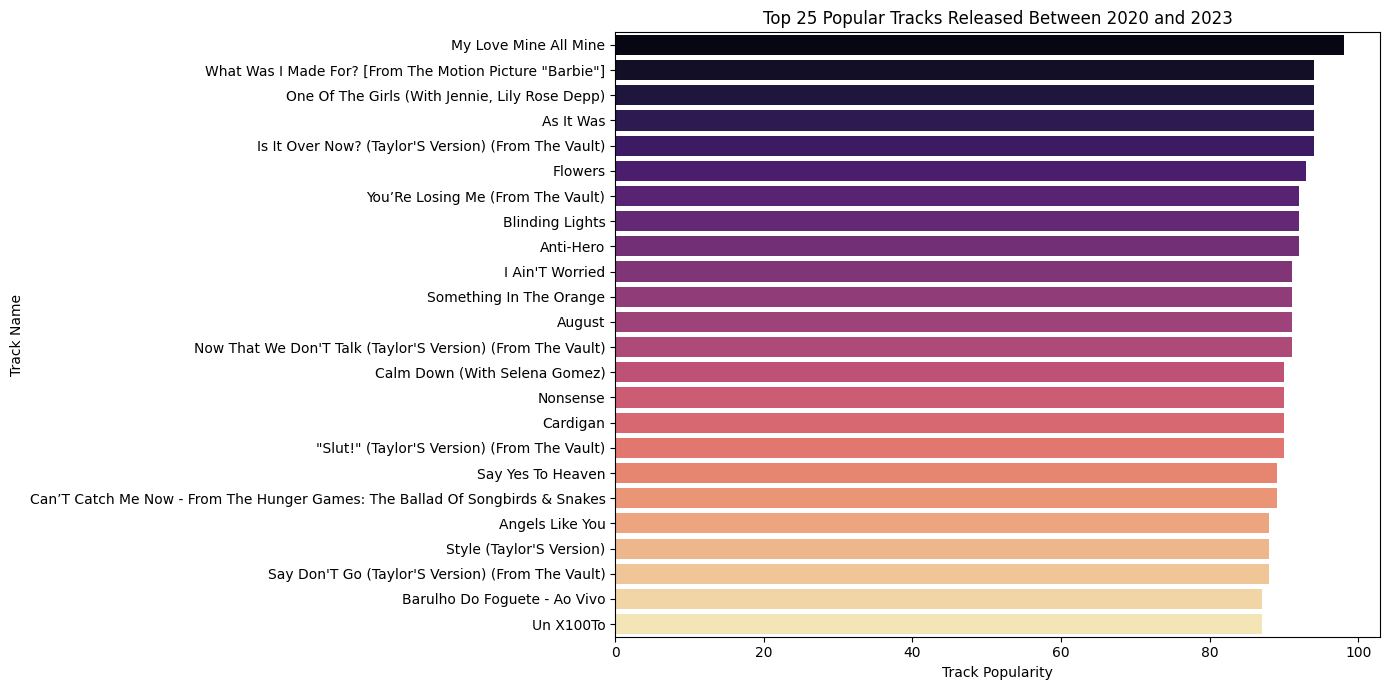

In [61]:
conn = sqlite3.connect('spotify_cleaned.db')

query = """
SELECT track_name, track_popularity, release_date
FROM spotify_tracks
WHERE release_date BETWEEN '2020-01-01' AND '2023-12-31'
ORDER BY track_popularity DESC
LIMIT 25;
"""

top_tracks = pd.read_sql_query(query, conn)
conn.close()

# Plot
plt.figure(figsize=(14,7))
sns.barplot(data=top_tracks, x='track_popularity', y='track_name', palette='magma')
plt.title('Top 25 Popular Tracks Released Between 2020 and 2023')
plt.xlabel('Track Popularity')
plt.ylabel('Track Name')
plt.tight_layout()
plt.show()
